In [59]:
import pandas as pd
from datetime import datetime
import matplotlib as plot

In [31]:
#directamente convertimos la columna a datetime cuando se carga el csv
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

In [32]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [33]:
df.loc[0, 'Date'].day_name()

'Friday'

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')
#para convertir una columna a datetime, especificamos el formato de nuestro datetime

In [34]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [35]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [36]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [38]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [39]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [43]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [44]:
df.set_index('Date', inplace=True)

In [47]:
df.loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [49]:
df.loc['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [52]:
df.loc['2020-01-01', 'High'].max()

132.68

In [58]:
highs = df['High'].resample('D').max().sort_index(ascending=False)
highs['2020-01-01']

132.68

<Axes: xlabel='Date'>

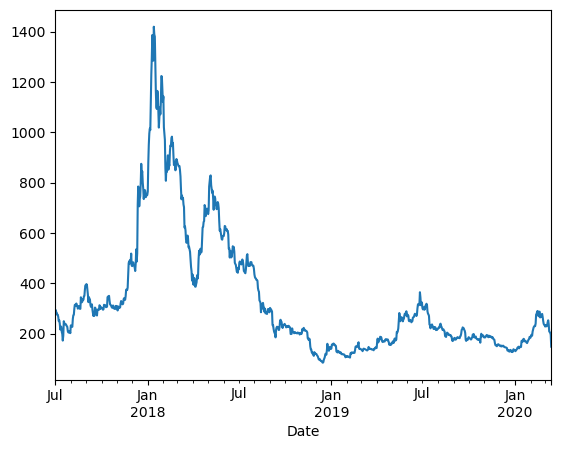

In [61]:
highs.plot()

In [62]:
df.resample('W').agg({'High':'max', 'Low':'min', 'Close':'mean', 'Volume':'sum'})

,High,Low,Close,Volume
Date,,,,
2017-07-02,293.73,253.23,268.202162,8.084631e+07
2017-07-09,285.00,231.25,261.062083,2.246746e+08
2017-07-16,240.33,130.26,195.698393,5.017750e+08
2017-07-23,249.40,153.25,212.783750,7.221637e+08
2017-07-30,229.99,178.03,203.309524,2.657305e+08
...,...,...,...,...
2020-02-16,290.00,216.31,255.198452,3.912867e+08
2020-02-23,287.13,242.36,265.321905,3.067838e+08
2020-03-01,278.13,209.26,236.373988,3.693920e+08
